In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd


path = "/content/drive/My Drive/fire_predict/base_data/"
df_train = pd.read_csv(path + "PJT002_train.csv")
df_val = pd.read_csv(path + "PJT002_validation.csv")
df_test = pd.read_csv(path + "PJT002_test.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,172,173,174,175,176,177,178,179) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df_eg_year = pd.read_csv(path + "df_eg_year.csv")
df_eg_year_val = pd.read_csv(path + "df_eg_year_val.csv")
df_eg_year_test = pd.read_csv(path + "df_eg_year_test.csv")

In [0]:
import math
import numpy as np
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from tqdm import tqdm

def f_data(train, val, test):

    X_train = train.drop(['fr_yn'], 1)
    y_train = train['fr_yn']
    X_val = val.drop(['fr_yn'], 1)
    y_val = val['fr_yn']
    X_test = test.drop(['fr_yn'], 1)

    df_all = pd.concat([X_train, X_val, X_test])

    categorical_cols = df_all.select_dtypes(['object']).columns
    for col in categorical_cols:
        df_all[col] = pd.Categorical(df_all[col]).codes

    X_train = df_all[:len(train)]
    X_val = df_all[len(train):-len(test)]
    X_test = df_all[-len(test):]

    X_train = X_train.fillna(-1)
    X_val = X_val.fillna(-1)
    X_test = X_test.fillna(-1)

    # X_train = X_train.replace({-1:np.NaN})
    # X_val = X_val.replace({-1:np.NaN})
    # X_test = X_test.replace({-1:np.NaN})

    return X_train, y_train, X_val, y_val, X_test

def f1_rfc(X_train, y_train, X_val, y_val):
    result_list = []
    for i in tqdm(range(10)):

        model = RandomForestClassifier(bootstrap=True, max_depth=80,
                                       max_features="auto", min_samples_leaf=4,
                                       min_samples_split=5, n_estimators=200,
                                       random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_val)
        result = f1_score(y_val, y_pred)
        result_list.append(result)
    return sum(result_list) / len(result_list)

def f1_rfc_2(X_train, y_train, X_val, y_val):
    result_list = []
    for i in tqdm(range(10)):

        model = RandomForestClassifier(random_state=42, n_estimators=1000)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_val)
        result = f1_score(y_val, y_pred)
        result_list.append(result)
    return sum(result_list) / len(result_list)

# lable -> binary
binary_y = {'N': 0, 'Y': 1}

df_train['fr_yn'] = df_train['fr_yn'].map(binary_y)
df_val['fr_yn'] = df_val['fr_yn'].map(binary_y)

#df ->df_2
df_train_2 = df_train
df_val_2 = df_val
df_test_2 = df_test

#drop id
df_train_2 = df_train_2.drop("id", axis=1)
df_val_2 = df_val_2.drop("id", axis=1)
df_test_2 = df_test_2.drop("id", axis=1)

#drop dt_of_fr
df_train_2 = df_train_2.drop("dt_of_fr", axis=1)
df_val_2 = df_val_2.drop("dt_of_fr", axis=1)
df_test_2 = df_test_2.drop("dt_of_fr", axis=1)

#dt_of_athrztn -> year 
def year(x):
    if x != "NaN":
        if isinstance(x, float):
            if not math.isnan(x):
                if int(x) >10000000:
                    return x // 10000
                elif int(x) > 1000000:
                    return x // 1000
                elif int(x) > 100000:
                    return x // 100
                elif int(x) > 10000:
                    return x // 10
                elif int(x) > 1000:
                    return x
        elif isinstance(x, str):
            return int(x[:4])

df_train_2["dt_of_athrztn"] = df_train_2["dt_of_athrztn"].apply(year)
df_train_2["dt_of_athrztn"] = df_train_2["dt_of_athrztn"].apply(lambda x: None if x > 3000 else x)
df_val_2["dt_of_athrztn"] = df_val_2["dt_of_athrztn"].apply(year)
df_val_2["dt_of_athrztn"] = df_val_2["dt_of_athrztn"].apply(lambda x: None if x > 3000 else x)
df_test_2["dt_of_athrztn"] = df_test_2["dt_of_athrztn"].apply(year)
df_test_2["dt_of_athrztn"] = df_test_2["dt_of_athrztn"].apply(lambda x: None if x > 3000 else x)

# hm_cnt -> categorical
# def population(x):
#     if x < 1000:
#         return "1k"
#     elif x < 10000:
#         return "10k"
#     elif x < 100000:
#         return "100k"
#     elif x < 1000000:
#         return "1000k"

# df_train_2["hm_cnt"] = df_train_2["hm_cnt"].apply(population)
# df_val_2["hm_cnt"] = df_val_2["hm_cnt"].apply(population)
# df_test_2["hm_cnt"] = df_test_2["hm_cnt"].apply(population)

#tmprtr c -> k
df_train_2.tmprtr = df_train_2.tmprtr.apply(lambda x: x + 273.15 if True else x)
df_val_2.tmprtr = df_val_2.tmprtr.apply(lambda x: x + 273.15 if True else x)
df_test_2.tmprtr = df_test_2.tmprtr.apply(lambda x: x + 273.15 if True else x)

#gas_engry_us_201507 x < 0 -> remove
df_train_2.gas_engry_us_201507 = df_train_2.gas_engry_us_201507.apply(lambda x: None if x < 0 else x)

# drop gas, elec
gas_elec_columns = list(df_train_2.iloc[:,16:136].columns)
df_train_2 = df_train_2.drop(gas_elec_columns, axis=1)
df_val_2 = df_val_2.drop(gas_elec_columns, axis=1)
df_test_2 = df_test_2.drop(gas_elec_columns, axis=1)

#concat eg_year
df_train_2 = pd.concat([df_train_2, df_eg_year], axis=1)
df_val_2 = pd.concat([df_val_2, df_eg_year_val], axis=1)
df_test_2 = pd.concat([df_test_2, df_eg_year_test], axis=1)

#for imputation
# s = df_train_2.isnull().sum()
# c_list = np.where(s >= max(s)*0.5)
# df_train_2 = df_train_2.drop(list(s.index[c_list[0]]), axis=1)

# df_val_2 = df_val_2.drop(list(s.index[c_list[0]]), axis=1)
# df_test_2 = df_test_2.drop(list(s.index[c_list[0]]), axis=1)

X_train, y_train, X_val, y_val, X_test = f_data(df_train_2, df_val_2, df_test_2)

In [0]:
def preprocessing():
    path = "/content/drive/My Drive/fire_predict/base_data/"
    df_train = pd.read_csv(path + "PJT002_train.csv")
    df_val = pd.read_csv(path + "PJT002_validation.csv")
    df_test = pd.read_csv(path + "PJT002_test.csv")

    df_eg_year = pd.read_csv(path + "df_eg_year.csv")
    df_eg_year_val = pd.read_csv(path + "df_eg_year_val.csv")
    df_eg_year_test = pd.read_csv(path + "df_eg_year_test.csv")

    # lable -> binary
    binary_y = {'N': 0, 'Y': 1}

    df_train['fr_yn'] = df_train['fr_yn'].map(binary_y)
    df_val['fr_yn'] = df_val['fr_yn'].map(binary_y)

    #df ->df_2
    df_train_2 = df_train
    df_val_2 = df_val
    df_test_2 = df_test

    #drop id
    df_train_2 = df_train_2.drop("id", axis=1)
    df_val_2 = df_val_2.drop("id", axis=1)
    df_test_2 = df_test_2.drop("id", axis=1)

    #drop dt_of_fr
    df_train_2 = df_train_2.drop("dt_of_fr", axis=1)
    df_val_2 = df_val_2.drop("dt_of_fr", axis=1)
    df_test_2 = df_test_2.drop("dt_of_fr", axis=1)

    #dt_of_athrztn -> year 

    df_train_2["dt_of_athrztn"] = df_train_2["dt_of_athrztn"].apply(year)
    df_train_2["dt_of_athrztn"] = df_train_2["dt_of_athrztn"].apply(lambda x: None if x > 3000 else x)
    df_val_2["dt_of_athrztn"] = df_val_2["dt_of_athrztn"].apply(year)
    df_val_2["dt_of_athrztn"] = df_val_2["dt_of_athrztn"].apply(lambda x: None if x > 3000 else x)
    df_test_2["dt_of_athrztn"] = df_test_2["dt_of_athrztn"].apply(year)
    df_test_2["dt_of_athrztn"] = df_test_2["dt_of_athrztn"].apply(lambda x: None if x > 3000 else x)

    # hm_cnt -> categorical
    # def population(x):
    #     if x < 1000:
    #         return "1k"
    #     elif x < 10000:
    #         return "10k"
    #     elif x < 100000:
    #         return "100k"
    #     elif x < 1000000:
    #         return "1000k"

    # df_train_2["hm_cnt"] = df_train_2["hm_cnt"].apply(population)
    # df_val_2["hm_cnt"] = df_val_2["hm_cnt"].apply(population)
    # df_test_2["hm_cnt"] = df_test_2["hm_cnt"].apply(population)

    #tmprtr c -> k
    df_train_2.tmprtr = df_train_2.tmprtr.apply(lambda x: x + 273.15 if True else x)
    df_val_2.tmprtr = df_val_2.tmprtr.apply(lambda x: x + 273.15 if True else x)
    df_test_2.tmprtr = df_test_2.tmprtr.apply(lambda x: x + 273.15 if True else x)

    #gas_engry_us_201507 x < 0 -> remove
    df_train_2.gas_engry_us_201507 = df_train_2.gas_engry_us_201507.apply(lambda x: None if x < 0 else x)

    # drop gas, elec
    gas_elec_columns = list(df_train_2.iloc[:,16:136].columns)
    df_train_2 = df_train_2.drop(gas_elec_columns, axis=1)
    df_val_2 = df_val_2.drop(gas_elec_columns, axis=1)
    df_test_2 = df_test_2.drop(gas_elec_columns, axis=1)

    #concat eg_year
    df_train_2 = pd.concat([df_train_2, df_eg_year], axis=1)
    df_val_2 = pd.concat([df_val_2, df_eg_year_val], axis=1)
    df_test_2 = pd.concat([df_test_2, df_eg_year_test], axis=1)

    #for imputation
    # s = df_train_2.isnull().sum()
    # c_list = np.where(s >= max(s)*0.5)
    # df_train_2 = df_train_2.drop(list(s.index[c_list[0]]), axis=1)

    # df_val_2 = df_val_2.drop(list(s.index[c_list[0]]), axis=1)
    # df_test_2 = df_test_2.drop(list(s.index[c_list[0]]), axis=1)

    # X_train, y_train, X_val, y_val, X_test = f_data(df_train_2, df_val_2, df_test_2)
    return df_train_2, df_val_2, df_test_2

In [0]:
from sklearn.impute import SimpleImputer


imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(df_train_2.select_dtypes("number"))
imputed_train_df = imp_mean.transform(df_train_2.select_dtypes("number"))
imputed_train_df
df_train_sinf_1 = pd.DataFrame(imputed_train_df, columns=df_train_2.select_dtypes("number").columns)
imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(df_val_2.select_dtypes("number"))
imputed_val_df = imp_mean.transform(df_val_2.select_dtypes("number"))
imputed_val_df
df_val_sinf_1 = pd.DataFrame(imputed_val_df, columns=df_val_2.select_dtypes("number").columns)

In [0]:
df_train_2, df_val_2, df_test_2 = preprocessing()
df_train_2[df_train_sinf_1.columns] = df_train_sinf_1
df_val_2[df_val_sinf_1.columns] = df_val_sinf_1
X_train, y_train, X_val, y_val, X_test = f_data(df_train_2, df_val_2, df_test_2)
f1_rfc(X_train, y_train, X_val, y_val)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (8,172,173,174,175,176,177,178,179) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):

100%|██████████| 10/10 [04:20<00:00, 26.00s/it]


0.5108958837772396

In [0]:
f1_rfc_2(X_train, y_train, X_val, y_val)


100%|██████████| 10/10 [23:30<00:00, 140.94s/it]


0.514859437751004

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
import numpy as np


# Number of trees in random forest
n_estimators = [100, 200, 1000, 2000]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [None, 60, 80, 100]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4, 10]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True],
 'max_depth': [None, 60, 80, 100],
 'max_features': ['auto'],
 'min_samples_leaf': [2, 4, 10],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 1000, 2000]}


In [0]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state=42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 3, random_state=42)
# Fit the random search model
rf_random.fit(X_train, y_train)
rf_random.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 144 is smaller than n_iter=200. Running 144 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 1000}

In [0]:
def f1_rfc_3(X_train, y_train, X_val, y_val):
    result_list = []
    for i in tqdm(range(10)):

        model = RandomForestClassifier(bootstrap=True, max_depth=None,
                                       max_features="auto", min_samples_leaf=2,
                                       min_samples_split=5, n_estimators=1000,
                                       random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_val)
        result = f1_score(y_val, y_pred)
        result_list.append(result)
    return sum(result_list) / len(result_list)

In [0]:
df_train_2, df_val_2, df_test_2 = preprocessing()
df_train_2[df_train_sinf_1.columns] = df_train_sinf_1
df_val_2[df_val_sinf_1.columns] = df_val_sinf_1
X_train, y_train, X_val, y_val, X_test = f_data(df_train_2, df_val_2, df_test_2)
f1_rfc_3(X_train, y_train, X_val, y_val)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (8,172,173,174,175,176,177,178,179) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
100%|██████████| 10/10 [23:47<00:00, 142.44s/it]


0.509105625252934

In [0]:
n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None,
 min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None,
  ccp_alpha=0.0, max_samples=None)[source]¶

In [0]:
from matplotlib.legend_handler import HandlerLine2D



n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200, 500, 1000, 2000, 3000]
train_results = []
test_results = []
for estimator in tqdm(n_estimators):
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   f1 = f1_score(y_train, train_pred)

   train_results.append(f1)
   y_pred = rf.predict(X_val)
   f1_2 = f1_score(y_val, y_pred)
   test_results.append(f1_2)



100%|██████████| 13/13 [14:13<00:00, 190.03s/it]


NameError: ignored

In [0]:
test_results

[0.3814211011996309,
 0.3815907059874888,
 0.35063342868818964,
 0.40353833192923333,
 0.4552845528455285,
 0.4696035242290749,
 0.4982346018046293,
 0.495733126454616,
 0.5035349567949724,
 0.5093216977389925,
 0.5099920063948841,
 0.5124497991967872,
 0.5056270096463023]

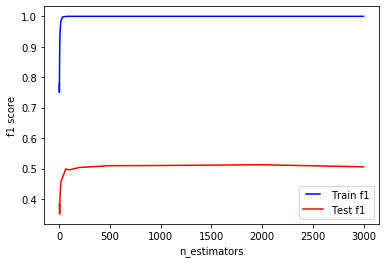

In [0]:
import matplotlib.pyplot as plt


line1, = plt.plot(n_estimators, train_results, "b", label="Train f1")
line2, = plt.plot(n_estimators, test_results, "r", label="Test f1")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("f1 score")
plt.xlabel("n_estimators")
plt.show()

In [0]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in tqdm(max_depths):
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   f1 = f1_score(y_train, train_pred)

   train_results.append(f1)
   y_pred = rf.predict(X_val)
   f1_2 = f1_score(y_val, y_pred)
   test_results.append(f1_2)



  0%|          | 0/32 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
  3%|▎         | 1/32 [00:00<00:17,  1.81it/s]/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
  6%|▋         |

In [0]:
test_results

[0.0,
 0.2330226364846871,
 0.3173431734317343,
 0.3736634777715251,
 0.402698495070057,
 0.49324324324324326,
 0.4808836023789295,
 0.44954954954954957,
 0.49654643131235604,
 0.5016477480776272,
 0.4953416149068323,
 0.4825421734013338,
 0.4685264663805436,
 0.46882217090069284,
 0.4673913043478261,
 0.46472727272727277,
 0.4310695404636031,
 0.44762622456669177,
 0.4329588014981273,
 0.4393019726858877,
 0.47418181818181815,
 0.4377682403433476,
 0.4468562874251497,
 0.44563662374821167,
 0.45154019534184814,
 0.4467935165609584,
 0.4318354912414318,
 0.43902439024390244,
 0.43724137931034485,
 0.448642266824085,
 0.43471400394477316,
 0.4081466395112016]

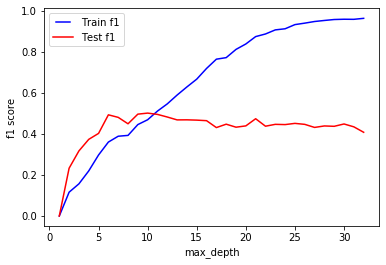

0.5016477480776272 9


In [0]:
import matplotlib.pyplot as plt


line1, = plt.plot(max_depths, train_results, "b", label="Train f1")
line2, = plt.plot(max_depths, test_results, "r", label="Test f1")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("f1 score")
plt.xlabel("max_depth")
plt.show()
print(max(test_results), test_results.index(max(test_results)))

In [0]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in tqdm(min_samples_splits):
   rf = RandomForestClassifier(min_samples_split=min_samples_split, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   f1 = f1_score(y_train, train_pred)

   train_results.append(f1)
   y_pred = rf.predict(X_val)
   f1_2 = f1_score(y_val, y_pred)
   test_results.append(f1_2)



  0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
 10%|█         | 1/10 [00:00<00:07,  1.22it/s]/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
 20%|██        | 2/10 [00:01<00:06,  1.23it/s]/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20

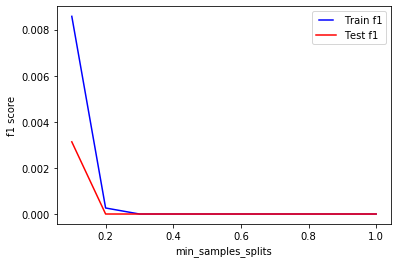

0.003132341425215349 0


In [0]:
import matplotlib.pyplot as plt


line1, = plt.plot(min_samples_splits, train_results, "b", label="Train f1")
line2, = plt.plot(min_samples_splits, test_results, "r", label="Test f1")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("f1 score")
plt.xlabel("min_samples_splits")
plt.show()
print(max(test_results), test_results.index(max(test_results)))

In [0]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in tqdm(min_samples_leafs):
   rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   f1 = f1_score(y_train, train_pred)

   train_results.append(f1)
   y_pred = rf.predict(X_val)
   f1_2 = f1_score(y_val, y_pred)
   test_results.append(f1_2)



  0%|          | 0/5 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
 20%|██        | 1/5 [00:00<00:02,  1.64it/s]/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/pyt

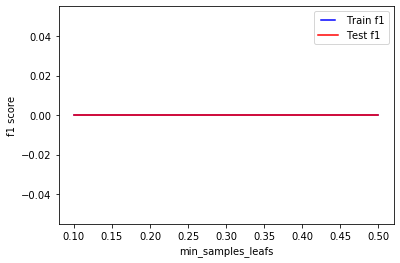

0.0 0


In [0]:
import matplotlib.pyplot as plt


line1, = plt.plot(min_samples_leafs, train_results, "b", label="Train f1")
line2, = plt.plot(min_samples_leafs, test_results, "r", label="Test f1")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("f1 score")
plt.xlabel("min_samples_leafs")
plt.show()
print(max(test_results), test_results.index(max(test_results)))

In [0]:
max_features = list(range(1,X_train.shape[1]))
train_results = []
test_results = []
for max_feature in tqdm(max_features):
   rf = RandomForestClassifier(max_features=max_feature, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   f1 = f1_score(y_train, train_pred)

   train_results.append(f1)
   y_pred = rf.predict(X_val)
   f1_2 = f1_score(y_val, y_pred)
   test_results.append(f1_2)

  0%|          | 0/68 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
  1%|▏         | 1/68 [00:00<01:01,  1.09it/s]/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
  3%|▎         | 2/68 [00:01<01:02,  1.06it/s]/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
  4%|▍         | 3/68 [00:03<01:04,  1.01it/s]/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in 

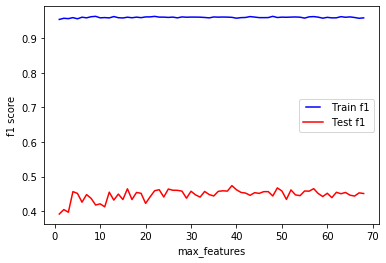

0.4736259682773885 38


In [0]:
line1, = plt.plot(max_features, train_results, "b", label="Train f1")
line2, = plt.plot(max_features, test_results, "r", label="Test f1")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("f1 score")
plt.xlabel("max_features")
plt.show()
print(max(test_results), test_results.index(max(test_results)))

In [0]:
def f1_rfc_3(X_train, y_train, X_val, y_val):
    result_list = []
    for i in tqdm(range(10)):

        model = RandomForestClassifier(bootstrap=True, max_depth=10,
                                       max_features="auto", n_estimators=2000,
                                       random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_val)
        result = f1_score(y_val, y_pred)
        result_list.append(result)
    return sum(result_list) / len(result_list)

In [0]:
df_train_2, df_val_2, df_test_2 = preprocessing()
df_train_2[df_train_sinf_1.columns] = df_train_sinf_1
df_val_2[df_val_sinf_1.columns] = df_val_sinf_1
X_train, y_train, X_val, y_val, X_test = f_data(df_train_2, df_val_2, df_test_2)
f1_rfc_3(X_train, y_train, X_val, y_val)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (8,172,173,174,175,176,177,178,179) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
100%|██████████| 10/10 [32:23<00:00, 194.34s/it]


0.5035490605427977

In [0]:
from xgboost import XGBClassifier

xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=3,
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=8, missing=None, n_estimators=600, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=0.5, verbosity=1)

In [0]:
def f1_eval(y_pred, dtrain):
    y_true = dtrain.get_label()
    err = 1-f1_score(y_true, np.round(y_pred))
    return 'f1_err', err

In [0]:
xgb.fit(X_train.values, y_train, eval_metric=f1_eval)
y_pred = xgb.predict(X_val.values)

f1 = f1_score(y_val, y_pred)
f1

0.5068937550689374

In [0]:
model_xgb = XGBClassifier(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1,
                             objective='binary:logistic')
model_xgb.fit(X_train.values, y_train, eval_metric=f1_eval)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1.7817, missing=None, n_estimators=2200,
              n_jobs=1, nthread=-1, objective='binary:logistic', random_state=7,
              reg_alpha=0.464, reg_lambda=0.8571, scale_pos_weight=1, seed=None,
              silent=1, subsample=0.5213, verbosity=1)

In [0]:

y_pred = model_xgb.predict(X_val.values)

f1 = f1_score(y_val, y_pred)
f1

0.486810551558753

In [0]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=2000)
xgb.fit(X_train.values, y_train, eval_metric=f1_eval)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=2000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:

y_pred = model_xgb.predict(X_val.values)

f1 = f1_score(y_val, y_pred)
f1

0.486810551558753

In [0]:
df_train_2, df_val_2, df_test_2 = preprocessing()
df_train_2[df_train_sinf_1.columns] = df_train_sinf_1
df_val_2[df_val_sinf_1.columns] = df_val_sinf_1
X_train, y_train, X_val, y_val, X_test = f_data(df_train_2, df_val_2, df_test_2)
f1_rfc_2(X_train, y_train, X_val, y_val)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (8,172,173,174,175,176,177,178,179) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
100%|██████████| 10/10 [25:30<00:00, 152.30s/it]


0.514859437751004

In [0]:
def f1_rfc_3(X_train, y_train, X_val, y_val):
    result_list = []
    for i in tqdm(range(10)):

        model = RandomForestClassifier(bootstrap=True, max_features="auto",
                                       n_estimators=1000,
                                       random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_val)
        result = f1_score(y_val, y_pred)
        result_list.append(result)
    return sum(result_list) / len(result_list)

In [0]:
f1_rfc_3(X_train, y_train, X_val, y_val)

100%|██████████| 10/10 [25:02<00:00, 149.18s/it]


0.514859437751004

In [0]:
def f1_rfc_3(X_train, y_train, X_val, y_val):
    result_list = []
    for i in tqdm(range(10)):

        model = RandomForestClassifier(bootstrap=True, max_features="auto",
                                       n_estimators=1000,
                                       max_depth=10,
                                       random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_val)
        result = f1_score(y_val, y_pred)
        result_list.append(result)
    return sum(result_list) / len(result_list)

In [0]:
f1_rfc_3(X_train, y_train, X_val, y_val)

100%|██████████| 10/10 [15:51<00:00, 94.98s/it]


0.5058236272878535

In [0]:
def f1_rfc_3(X_train, y_train, X_val, y_val):
    result_list = []
    for i in tqdm(range(10)):

        model = RandomForestClassifier(bootstrap=True, max_features="auto",
                                       n_estimators=1000,
                                       min_samples_split=5,
                                       random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_val)
        result = f1_score(y_val, y_pred)
        result_list.append(result)
    return sum(result_list) / len(result_list)
f1_rfc_3(X_train, y_train, X_val, y_val)

100%|██████████| 10/10 [24:51<00:00, 150.42s/it]


0.5076674737691685

In [0]:
def f1_rfc_3(X_train, y_train, X_val, y_val):
    result_list = []
    for i in tqdm(range(10)):

        model = RandomForestClassifier(bootstrap=True, max_features="auto",
                                       n_estimators=1000,
                                       min_samples_leaf=2,
                                       random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_val)
        result = f1_score(y_val, y_pred)
        result_list.append(result)
    return sum(result_list) / len(result_list)
f1_rfc_3(X_train, y_train, X_val, y_val)

100%|██████████| 10/10 [24:32<00:00, 146.96s/it]


0.5106215578284815